# Polymorphism

len()

In [1]:
len([1,2,3])

3

In [7]:
# tuple

len((1,2,3))

3

In [6]:
# set

len({1,4,1})

2

In [5]:
# string

len("hello")

5

'+'

In [ ]:
# integral

2+3

5

In [9]:
# string

"2" + "3"

'23'

In [ ]:
# Dont work to combine

"2" + 3

TypeError: can only concatenate str (not "int") to str

'*'

In [ ]:
# integral

2*10

20

In [ ]:
# string and integral works

"2"*5

'22222'

In [ ]:
# string and float doesn't work

"2"*5.2

TypeError: can't multiply sequence by non-int of type 'float'

## Polymorhism in class methods

In [2]:
class Fish:
    def __init__(self, name):
        self.name = name
        
    def __str__(self):
        return f"I am a fish and my name is {self.name}"
    
    def speak(self):
        print("blupp, blupp, blupp")
    
class Fox:
    def __init__(self, name):
        self.name = name
    
    def __str__(self):
        return f"I am a fox and my name is {self.name}. No one knows how I sound"
    
    def speak(self):
        NotImplemented
    
animals = (Fish("Pelle"), Fox("Ylvis"))

for animal in animals:
    print(animal)
    animal.speak()

I am a fish and my name is Pelle
blupp, blupp, blupp
I am a fox and my name is Ylvis. No one knows how I sound


## Operator overloading

 <table style=\"display:inline-block; text-align:left;\">
      <tr style=\"background-color: #174A7E; color: white;\">
        <th>Operator</th>
        <th>Dunder Method</th>
      </tr>
      <tr>
        <td style=\"text-align: center;\">+</td>
        <td style=\"text-align: center;\">__add__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">-</td>
        <td style=\"text-align: center;\">__sub__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">*</td>
        <td style=\"text-align: center;\">__mul__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">/</td>
        <td style=\"text-align: center;\">__div__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">//</td>
        <td style=\"text-align: center;\">__floordiv__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">%</td>
        <td style=\"text-align: center;\">__mod__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">**</td>
        <td style=\"text-align: center;\">__pow__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\"><</td>
        <td style=\"text-align: center;\">__lt__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\"><=</td>
        <td style=\"text-align: center;\">__le__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">></td>
        <td style=\"text-align: center;\">__gt__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">>=</td>
        <td style=\"text-align: center;\">__ge__(self, other)</td>
      </tr>
      <tr>
        <td style=\"text-align: center;\">==</td>
        <td style=\"text-align: center;\">__eq__(self, other)</td>
      </tr>
    </table>

In [ ]:
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, *numbers: float) -> None:
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number in a vector")
        
        if not len(numbers):
            raise ValueError("Vectors can't be empty")
        
        self._numbers = tuple(float(number) for number in numbers)

v1 = Vector(1,2,3)
v1

In [6]:
# dont do this  

v1._numbers

(1.0, 2.0, 3.0)

In [10]:
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, *numbers: float) -> None:
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number in a vector")
        
        if not len(numbers):
            raise ValueError("Vectors can't be empty")
        
        self._numbers = tuple(float(number) for number in numbers)
    
    @property
    def numbers(self) -> tuple:
        return self._numbers

v2 = Vector(2,4,5)
v2.numbers

(2.0, 4.0, 5.0)

In [12]:
try:
    v2.numbers = (1,2)
except AttributeError as err:
    print(err)

property 'numbers' of 'Vector' object has no setter


In [53]:
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, *numbers: float) -> None:
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number in a vector")
        
        if not len(numbers):
            raise ValueError("Vectors can't be empty")
        
        self._numbers = tuple(float(number) for number in numbers)
    
    @property
    def numbers(self) -> tuple:
        return self._numbers
    
    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (num1 + num2 for num1, num2 in zip(self.numbers, other.numbers))
            return Vector(*numbers)
        
    def __sub__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (num1 - num2 for num1, num2 in zip(self.numbers, other.numbers))
            return Vector(*numbers)
        
    def __mul__(self, value: int | float) -> Vector:
        if not isinstance(value, (float, int)):
            raise TypeError(f"The value for multiplication must be int or float not {type(value)}")
        print("__mul__ called")
        numbers = (number * value for number in self.numbers)
        return Vector(*numbers)
    
    def __rmul__(self, value: float) -> Vector:
        print("__rmul__ called")
        return self * value
    
    def validate_vectors(self, other: Vector) -> bool:
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError(f"Both must be Vector and have same length")
        return len(self) == len(other)
    
    def __len__(self) -> int:
        return len(self.numbers)
    
    def __repr__(self) -> str:
        return f"Vektor{self.numbers}"
    
    def __getitem__(self, item: int) -> float:
        return self.numbers[item]
    
    def plot(self, *others: Vector) -> None:
        X, Y = [], []
        
        for vector in tuple(others):
            # Validation for 2D
            X.append(vector[0])
            Y.append(vector[1])

        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        print(originX)
        print(originY)
        print(X)
        print(Y)


        _, ax = plt.subplots(1)

        ax.quiver(originX, originY, X, Y, scale_units = "xy", angles = "xy", scale = 1)
        ax.set(
            xlabel = "x",
            ylabel = "y",
            title = f"{self}, {others}",
            xlim = (-2, 10),
            ylim = (-2, 10)
        )
        ax.grid()

(0, 0, 0)
(0, 0, 0)
[3.0, 2.0, 5.0]
[4.0, 6.0, 10.0]


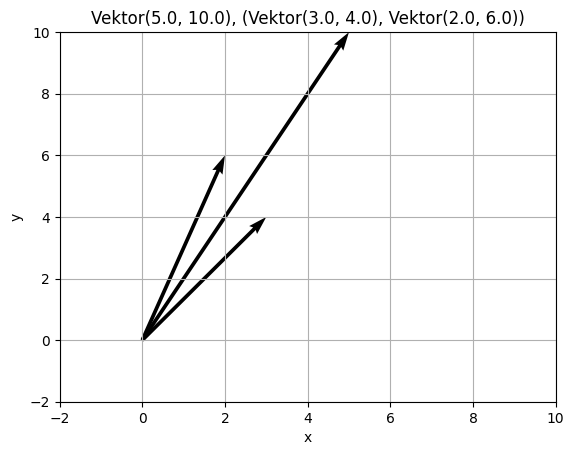

In [54]:
vek2 = Vector(3, 4)
vek3 = Vector(2, 6)
vek4 = vek2 + vek3

vek4.plot(vek2, vek3)